In [1]:
# Increase discplay size of jupyter notebook cells
from IPython.display import display, HTML, IFrame
display(HTML("<style> div#notebook-container { width: 80%; }  </style> "))

import pandas as pd

# Print everything from the code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# print all column width
pd.options.display.max_colwidth = 1000

####################################################################

from PIL import Image
import requests
from io import StringIO

import matplotlib as mpl # for plotting
from matplotlib import cm # for colours
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.ticker as ticker



In [2]:
# read in png flag urls dataset
df_flags = pd.read_csv('https://raw.githubusercontent.com/dimitris1ps/country_flags/master/countries_flags.csv')

In [3]:
# set attributes to img
df_flags['Flag']  = list('<img src="'+ df_flags['Flag']  + '" width="40" >')

In [4]:
df_flags.head()

,Country,Code,Flag
0,Afghanistan,AF,"<img src=""https://raw.githubusercontent.com/dimitris1ps/country_flags/master/flags/flag-of-Afghanistan.png"" width=""40"" >"
1,Albania,AL,"<img src=""https://raw.githubusercontent.com/dimitris1ps/country_flags/master/flags/flag-of-Albania.png"" width=""40"" >"
2,Algeria,DZ,"<img src=""https://raw.githubusercontent.com/dimitris1ps/country_flags/master/flags/flag-of-Algeria.png"" width=""40"" >"
3,Andorra,AD,"<img src=""https://raw.githubusercontent.com/dimitris1ps/country_flags/master/flags/flag-of-Andorra.png"" width=""40"" >"
4,Angola,AO,"<img src=""https://raw.githubusercontent.com/dimitris1ps/country_flags/master/flags/flag-of-Angola.png"" width=""40"" >"


In [5]:
# dummy data
df = pd.DataFrame({'x':[1, 2, 3, 4, 5], 'y':[5, 4, 3, 2, 1]}, index=['GB', 'DE', 'FR', 'IT', 'GR'])

In [6]:
df

,x,y
GB,1,5
DE,2,4
FR,3,3
IT,4,2
GR,5,1


In [7]:
# kepp relevant countries
flags_dict = df_flags[['Code', 'Flag']].set_index('Code').to_dict()['Flag']

In [8]:
# replae countries with img tag
df.index = df.index.map(flags_dict)

In [9]:
df

,x,y
"<img src=""https://raw.githubusercontent.com/dimitris1ps/country_flags/master/flags/flag-of-United-Kingdom.png"" width=""40"" >",1,5
"<img src=""https://raw.githubusercontent.com/dimitris1ps/country_flags/master/flags/flag-of-Germany.png"" width=""40"" >",2,4
"<img src=""https://raw.githubusercontent.com/dimitris1ps/country_flags/master/flags/flag-of-France.png"" width=""40"" >",3,3
"<img src=""https://raw.githubusercontent.com/dimitris1ps/country_flags/master/flags/flag-of-Italy.png"" width=""40"" >",4,2
"<img src=""https://raw.githubusercontent.com/dimitris1ps/country_flags/master/flags/flag-of-Greece.png"" width=""40"" >",5,1


In [10]:
# print as html
df.style.set_properties(**{'text-align': 'center'})

,x,y
,1,5
,2,4
,3,3
,4,2
,5,1


In [11]:
df.T.style.set_properties(**{'text-align': 'center'})

,,,,,
x,1,2,3,4,5
y,5,4,3,2,1


Alternative approach

In [12]:
def path_to_image_html(path, width=25):
    return f'<img src="{path}" width="{width}" >'

In [13]:
# dummy data
df = pd.DataFrame({'x':[1, 2, 3, 4, 5], 'y':[5, 4, 3, 2, 1]}, index=['GB', 'DE', 'FR', 'IT', 'GR'])
df = df.reset_index().rename(columns={'index':'country'})

# read in png flag urls dataset
df_flags = pd.read_csv('https://raw.githubusercontent.com/dimitris1ps/country_flags/master/countries_flags.csv')

# kepp relevant countries
flags_dict = df_flags[['Code', 'Flag']].set_index('Code').to_dict()['Flag']

# replae countries with img tag
df['country'] = df['country'].map(flags_dict)

In [14]:
HTML(df.to_html(index=False, escape=False, formatters=dict(country=lambda x: path_to_image_html(x, width=50))))

country,x,y
,1,5
,2,4
,3,3
,4,2
,5,1


Image in chart

In [15]:
apps = {
          'discord':{'color':'#7289da','imgUrl':'https://i.ibb.co/zbWkwbV/discord.png'},
          'Facebook':{'color':'#4267B2', 'imgUrl':'https://i.ibb.co/cC0Xwfp/Facebook.png'}, 
          'Instagram':{'color':'#C13584','imgUrl':'https://i.ibb.co/g926NSd/Instagram.png'}, 
          'Line':{'color':'#00c300','imgUrl':'https://i.ibb.co/mXpqLmG/Line.png'}, 
          'Messenger':{'color':'#0084ff','imgUrl':'https://i.ibb.co/Xxr3QgF/Messenger.png'}, 
          'Pinterest':{'color':'#E60023','imgUrl':'https://i.ibb.co/GsqNyW5/Pinterest.png'}, 
          'Snapchat':{'color':'#fffc00','imgUrl':'https://i.ibb.co/NmfkBd1/Snapchat.png'}, 
          'Telegram':{'color':'#0088cc','imgUrl':'https://i.ibb.co/xSfsx9f/Telegram.png'}, 
          'TikTok':{'color':'#000000','imgUrl':'https://i.ibb.co/d7TWBZc/TikTok.png'}, 
          'Twitch':{'color':'#6441a5','imgUrl':'https://i.ibb.co/Z82L2kH/Twitch.png'}, 
          'Twitter':{'color':'#1da1f2','imgUrl': 'https://i.ibb.co/bL8V53Q/Twitter.png'}, 
          'WhatsApp':{'color':'#25D366','imgUrl': 'https://i.ibb.co/0XGbzrD/WhatsApp.png'}, 
          'Youtube':{'color':'#FF0000','imgUrl': 'https://i.ibb.co/gwRySXY/Youtube.png'}
         }

In [16]:
# [x , y]
imgLocation = {
          'discord': [1.28, 1.07],          
          'Facebook': [1, 1.07], 
          'Instagram': [1.01, 1.1],
          'Line': [3, 1.01],
          'Messenger': [1, 1.25],
          'Pinterest': [1.1, 1.2],
          'Snapchat': [1, 1.15],
          'Telegram': [2, 1.12],
          'TikTok': [1, 1.1],
          'Twitch': [1.7, 1],
          'Twitter': [1, 1.16], 
          'WhatsApp': [1, 1.15], 
          'Youtube': [1, 0.96]
         }

imgZoom = {
          'discord':0.5,          
          'Facebook':0.5,
          'Instagram':0.5,
          'Line':0.5,
          'Messenger':0.5,
          'Pinterest':0.5,
          'Snapchat':0.5,
          'Telegram':0.5,
          'TikTok':0.5,
          'Twitch':0.5,
          'Twitter':0.5,
          'WhatsApp':0.5,
          'Youtube':0.5
         }

In [17]:
df = pd.DataFrame({'App':['discord', 'Snapchat', 'Telegram', 'TikTok', 'Twitch'], 'x':[1, 2, 3, 4, 5], 'y':[5, 4, 3, 2, 1]})

In [18]:
df

,App,x,y
0,discord,1,5
1,Snapchat,2,4
2,Telegram,3,3
3,TikTok,4,2
4,Twitch,5,1


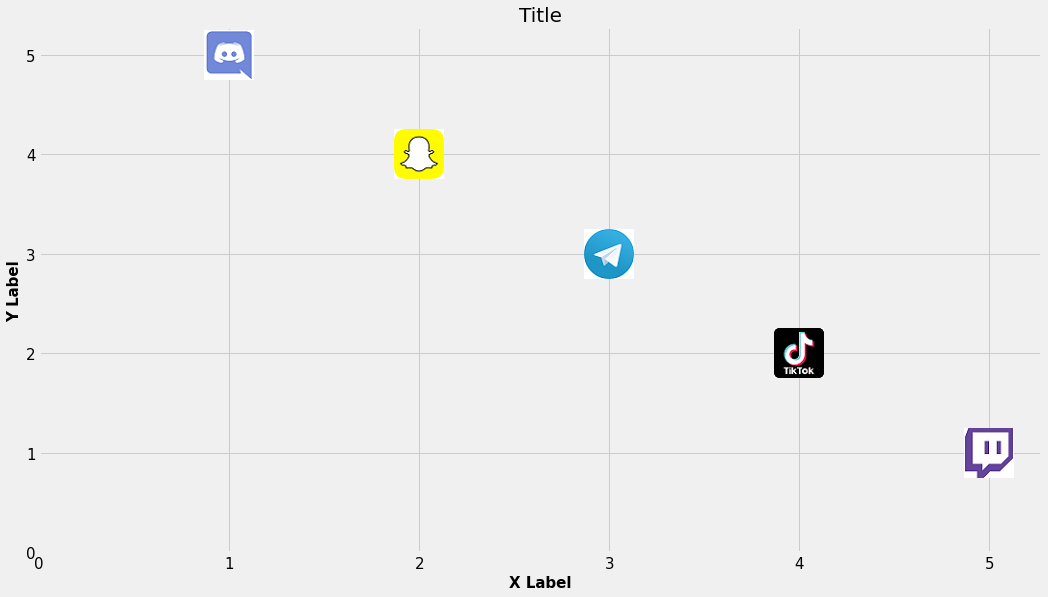

In [22]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
fig.set_size_inches(16, 9)
ax = plt.axes()

# include brand images
for app in df['App'].unique():
    df_row = df[df['App'] == app]

    img = Image.open(requests.get(apps[app]['imgUrl'], stream=True).raw)
    img = OffsetImage(img, zoom=imgZoom[app]*2)

    ab = AnnotationBbox(img, (float(df_row['x']), float(df_row['y'])), frameon=False)
    ax.add_artist(ab)

ax.scatter(x=5, y=5, c='white', s=0)
# ax.annotate('', xy=(0,0), xytext=(0,0), arrowprops={'arrowstyle': '->', 'lw': 2.5, 'color': 'white'}, va='center')


ax.set_ylabel('Y Label', size=15, fontweight='bold')
ax.set_xlabel('X Label', size=15, fontweight='bold')
ax.set_title('Title', size=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)


ax.xaxis.set_major_formatter(ticker.EngFormatter())

plt.show();